<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mesura-de-la-distància-mitjançant-el-mètode-de-les-candeles-estàndard" data-toc-modified-id="Mesura-de-la-distància-mitjançant-el-mètode-de-les-candeles-estàndard-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mesura de la distància mitjançant el mètode de les candeles estàndard</a></span><ul class="toc-item"><li><span><a href="#Llegir-les-imatges" data-toc-modified-id="Llegir-les-imatges-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Llegir les imatges</a></span></li><li><span><a href="#Mostrar-les-imatges" data-toc-modified-id="Mostrar-les-imatges-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Mostrar les imatges</a></span></li><li><span><a href="#Obtenir-la-magnitud" data-toc-modified-id="Obtenir-la-magnitud-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Obtenir la magnitud</a></span></li></ul></li></ul></div>

# Mesura de la distància mitjançant el mètode de les candeles estàndard

El fragment de codi que segueix ens permet carregar una imatge i associar-la amb la imatge de fons de cel corresponent. També li podrem demanar el número de comptes normalitzades en una regió de la imatge. La normalització ens permet comparar el nombre de comptes en imatges amb diferent temps d'observació

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.units as u

%matplotlib inline
class StandardCandle(object):
    """
    This object contains the methods required to get the normalized number of counts on a square box for a given image
    Optionally, subtract the sky of the image.
    """
    def __init__(self, image_name, sky_name=None, exp_time=1, exp_time_sky=None):
        """
        Initialize instance
        
        INPUT:
        image_name (str)                  - name of the fits file containing the image
        sky_name (str, optional)          - name of the fits file containing the sky image; default: None
        exp_time (int or float, optional) - exposure time of the image, in seconds; default: 1
        exp_time_sky (int or float or None, optional - exposure time of the sku image, in seconds. If None,
                                                       then use the same as exp_time; default: None
        """
        # check parameter types
        if not (type(image_name) == str):
            raise AssertionError("Invalid type for image_name")
        if sky_name is not None and not (type(sky_name) == str):
            raise AssertionError("Invalid type for sky_name")
        if not (type(exp_time) == float or type(exp_time) == int):
            raise AssertionError("Invalid type for exp_time")
        
        
        self.__exp_time = exp_time
        
        # load data
        image = fits.open(image_name)
        self.__image = image[0].data
        image.close()
        if sky_name != None:
            sky = fits.open(sky_name)
            self.__sky = sky[0].data
            # renormalize different image times
            if exp_time_sky is not None and exp_time_sky != exp_time:
                self.__sky = self.__sky/exp_time_sky*exp_time
            sky.close()
        
        # subtract sky
        if sky_name == None:
            self.__image_subtrated = self.__image
        else:
            self.__image_subtrated = self.__image - self.__sky

    def plot_image(self, xmin=None, xmax=None, ymin=None, ymax=None):
        """
        Plot a region of the image. Optionally specify a box 
        
        INPUT:
        xmin, xmax, ymin, ymax (int or float, optional) - limits of the box to plot; default: None
        
        """
        # plot settings
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_xlabel('pixel', fontsize=20)
        ax.set_ylabel('pixel', fontsize=20)
        ax.tick_params(axis='both', pad=10, labelsize=20, width=2, length=6)
        
        # plot image
        plot = ax.imshow(self.__image_subtrated)
        
        # fix region
        if xmin == None:
            xmin = ax.get_xlim()[0]
        if xmax == None:
            xmax = ax.get_xlim()[1]
        ax.set_xlim((xmin, xmax))
        if ymin == None:
            ymin = ax.get_ylim()[0]
        if ymax == None:
            ymax = ax.get_ylim()[1]
        ax.set_ylim((ymin, ymax))
        
        # plot colorbar
        cbar = fig.colorbar(plot, shrink=0.5)
        cbar.ax.tick_params(pad=10, labelsize=20, width=2, length=6)
        cbar.ax.set_ylabel("counts", fontsize=20)
        
        
    def get_counts(self, xmin, xmax, ymin, ymax):
        """
        Return the normalized number of counts in the specified box
        """
        if xmin == None:
            xmin = 0
        if xmax == None:
            xmax = -1
        if ymin == None:
            ymin = 0
        if ymax == None:
            ymax = -1
        
        return np.sum(self.__image_subtrated[ymin:ymax,xmin:xmax])/self.__exp_time
   
    def get_magnitude(self, xmin, xmax, ymin, ymax):
        return -2.5*np.log10(self.get_counts(xmin, xmax, ymin, ymax))
        
        

## Llegir les imatges

Aquí ens cal especificar les imatges que volem reduïr. A la variable image_name hi posarem el nom de la imatge amb la llum i a la variable sky_name hi posarem el nom d'una imatge de cel, sense la llum

In [ ]:
image_name = "/Users/iprafols/Desktop/candeles/candeles_victor_2024/DSC01153.fits.gz"
sky_name = "/Users/iprafols/Desktop/candeles/candeles_victor_2024/DSC01158.fits.gz"
exposure_time = 1/300
measure = StandardCandle(image_name, sky_name, exposure_time)

In [9]:
hdu = fits.open(image_name)
hdu.info()
hdu[0].header

Filename: /Users/iprafols/Desktop/candeles/candeles_victor_2024/DSC01153.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (6024, 4024)   float32   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6024                                                  
NAXIS2  =                 4024                                                  
EXTEND  =                    T                                                  

In [10]:
ls

LICENSE                        examples/
README.md                      raw_to_fits.py
__pycache__/                   reduce_standard_candles.ipynb


In [11]:
ls examples/

DSC_0042.NEF*     DSC_0043.NEF*     IMG_2331.CR2*
DSC_0042.fits.gz  DSC_0043.fits.gz  IMG_2331.fits.gz


## Mostrar les imatges

En primer lloc mostrem la imatge sencera

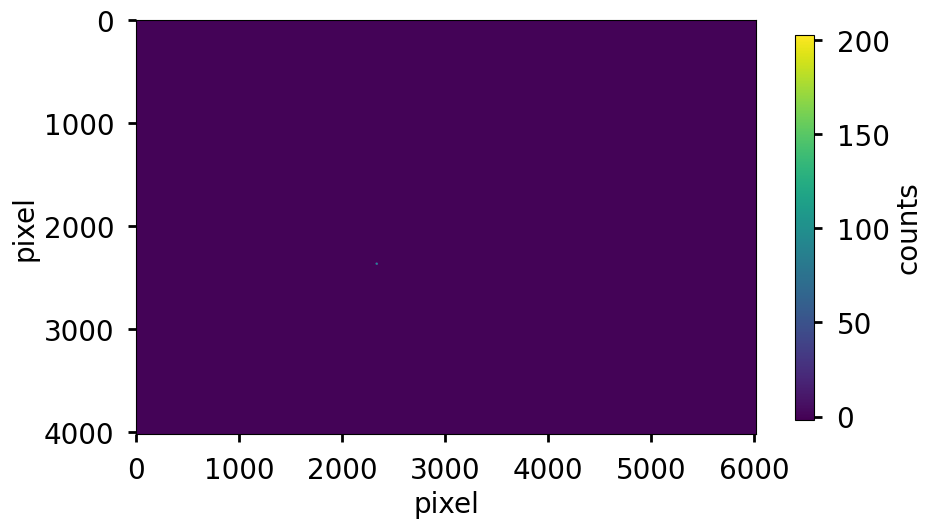

In [12]:
xmin = None
xmax = None
ymin = None
ymax = None
measure.plot_image(xmin, xmax, ymin, ymax)


Anem canviant els valors de xmin, xmax, ymin i ymax per a poder seleccionar la zona de la imatge amb l'emissió

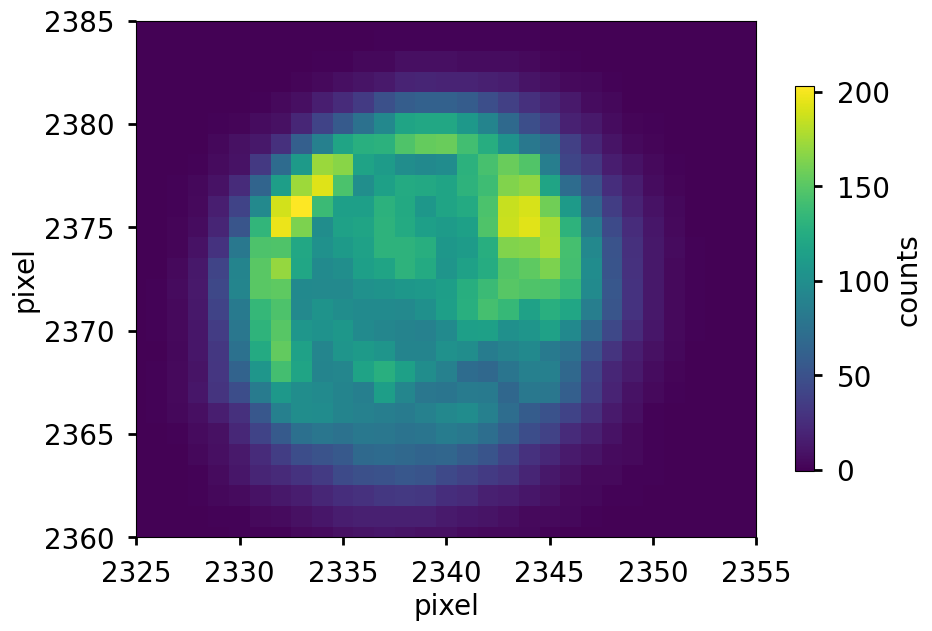

In [17]:
xmin = 2325
xmax = 2355
ymin = 2360
ymax = 2385
measure.plot_image(xmin, xmax, ymin, ymax)


## Obtenir la magnitud



In [18]:
measure.get_magnitude(xmin, xmax, ymin, ymax)


-17.501974243875196

In [ ]:
-17.501974243875196